<a href="https://colab.research.google.com/github/ttma333/python/blob/main/1DConvnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1D 컨브넷
- Conv1D 층을 사용하여 구현, Conv2D와 인터페이스가 비슷함(samples,time,feature) 크기의 3D 텐서를 입력받고 비슷한 형태의 3D 텐서를 반환
- 합성곱 윈도우는 시간 축의 1D 윈도우이며 입력텐서의 두번쨰 축임 

In [28]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_feautures = 10000
max_len=500

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_feautures)
print(len(x_train),len(x_test))

25000 25000


In [29]:
x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen=max_len)
print(x_train.shape,x_test.shape)

(25000, 500) (25000, 500)


In [30]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_feautures,128,input_length=max_len))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_8 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                

In [31]:
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 2s 11ms/step - loss: 0.9043 - accuracy: 0.5081 - val_loss: 0.6881 - val_accuracy: 0.5448
Epoch 2/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6728 - accuracy: 0.6413 - val_loss: 0.6664 - val_accuracy: 0.6596
Epoch 3/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6298 - accuracy: 0.7545 - val_loss: 0.6182 - val_accuracy: 0.7354
Epoch 4/10
157/157 [==============================] - 2s 10ms/step - loss: 0.5455 - accuracy: 0.8137 - val_loss: 0.5051 - val_accuracy: 0.8062
Epoch 5/10
157/157 [==============================] - 2s 10ms/step - loss: 0.4202 - accuracy: 0.8497 - val_loss: 0.4192 - val_accuracy: 0.8366
Epoch 6/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3445 - accuracy: 0.8763 - val_loss: 0.4136 - val_accuracy: 0.8516
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3020 - accuracy: 0.8943 - val_loss: 0.4071 - val_accuracy: 0.8588

In [25]:
from keraspp import skeras

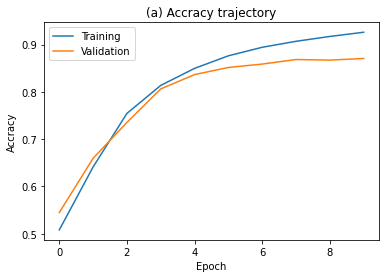

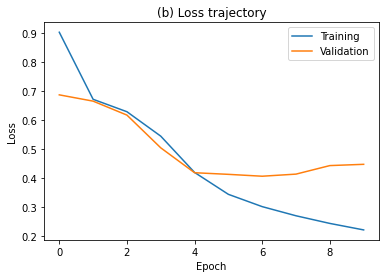

In [32]:
skeras.plot_acc_loss(history)